# Homework w03d02

This question involves the use of multiple linear regression on the Auto data set.
1. Produce a scatterplot matrix which includes all of the variables in the data set.
1. Compute the matrix of correlations between the variables using either the function you created in the previous exercises or with pd.corr(). You will need to exclude the name variable, which is qualitative.
1. Perform a multiple linear regression with mpg as the response and all other variables except name as the predictors. Produce a summary of the results. Comment on the output. For instance:
     - Is there a relationship between the predictors and the response?
     - Which predictors appear to have a statistically significant relationship to the response?
     - What does the coefficient for the year variable suggest?
<!--1. Produce diagnostic plots of the linear regression fit. Comment on any problems you see with the fit. Do the residual plots suggest any unusually large outliers? Does the leverage plot identify any observations with unusually high leverage?-->
1. Fit linear regression models with interaction effects. Do any interactions appear to be statistically significant?
1. Try a few different transformations of the variables, such as $\log{X}$, $\sqrt{X}$, $X^2$ and try fits on them. Comment on your findings.

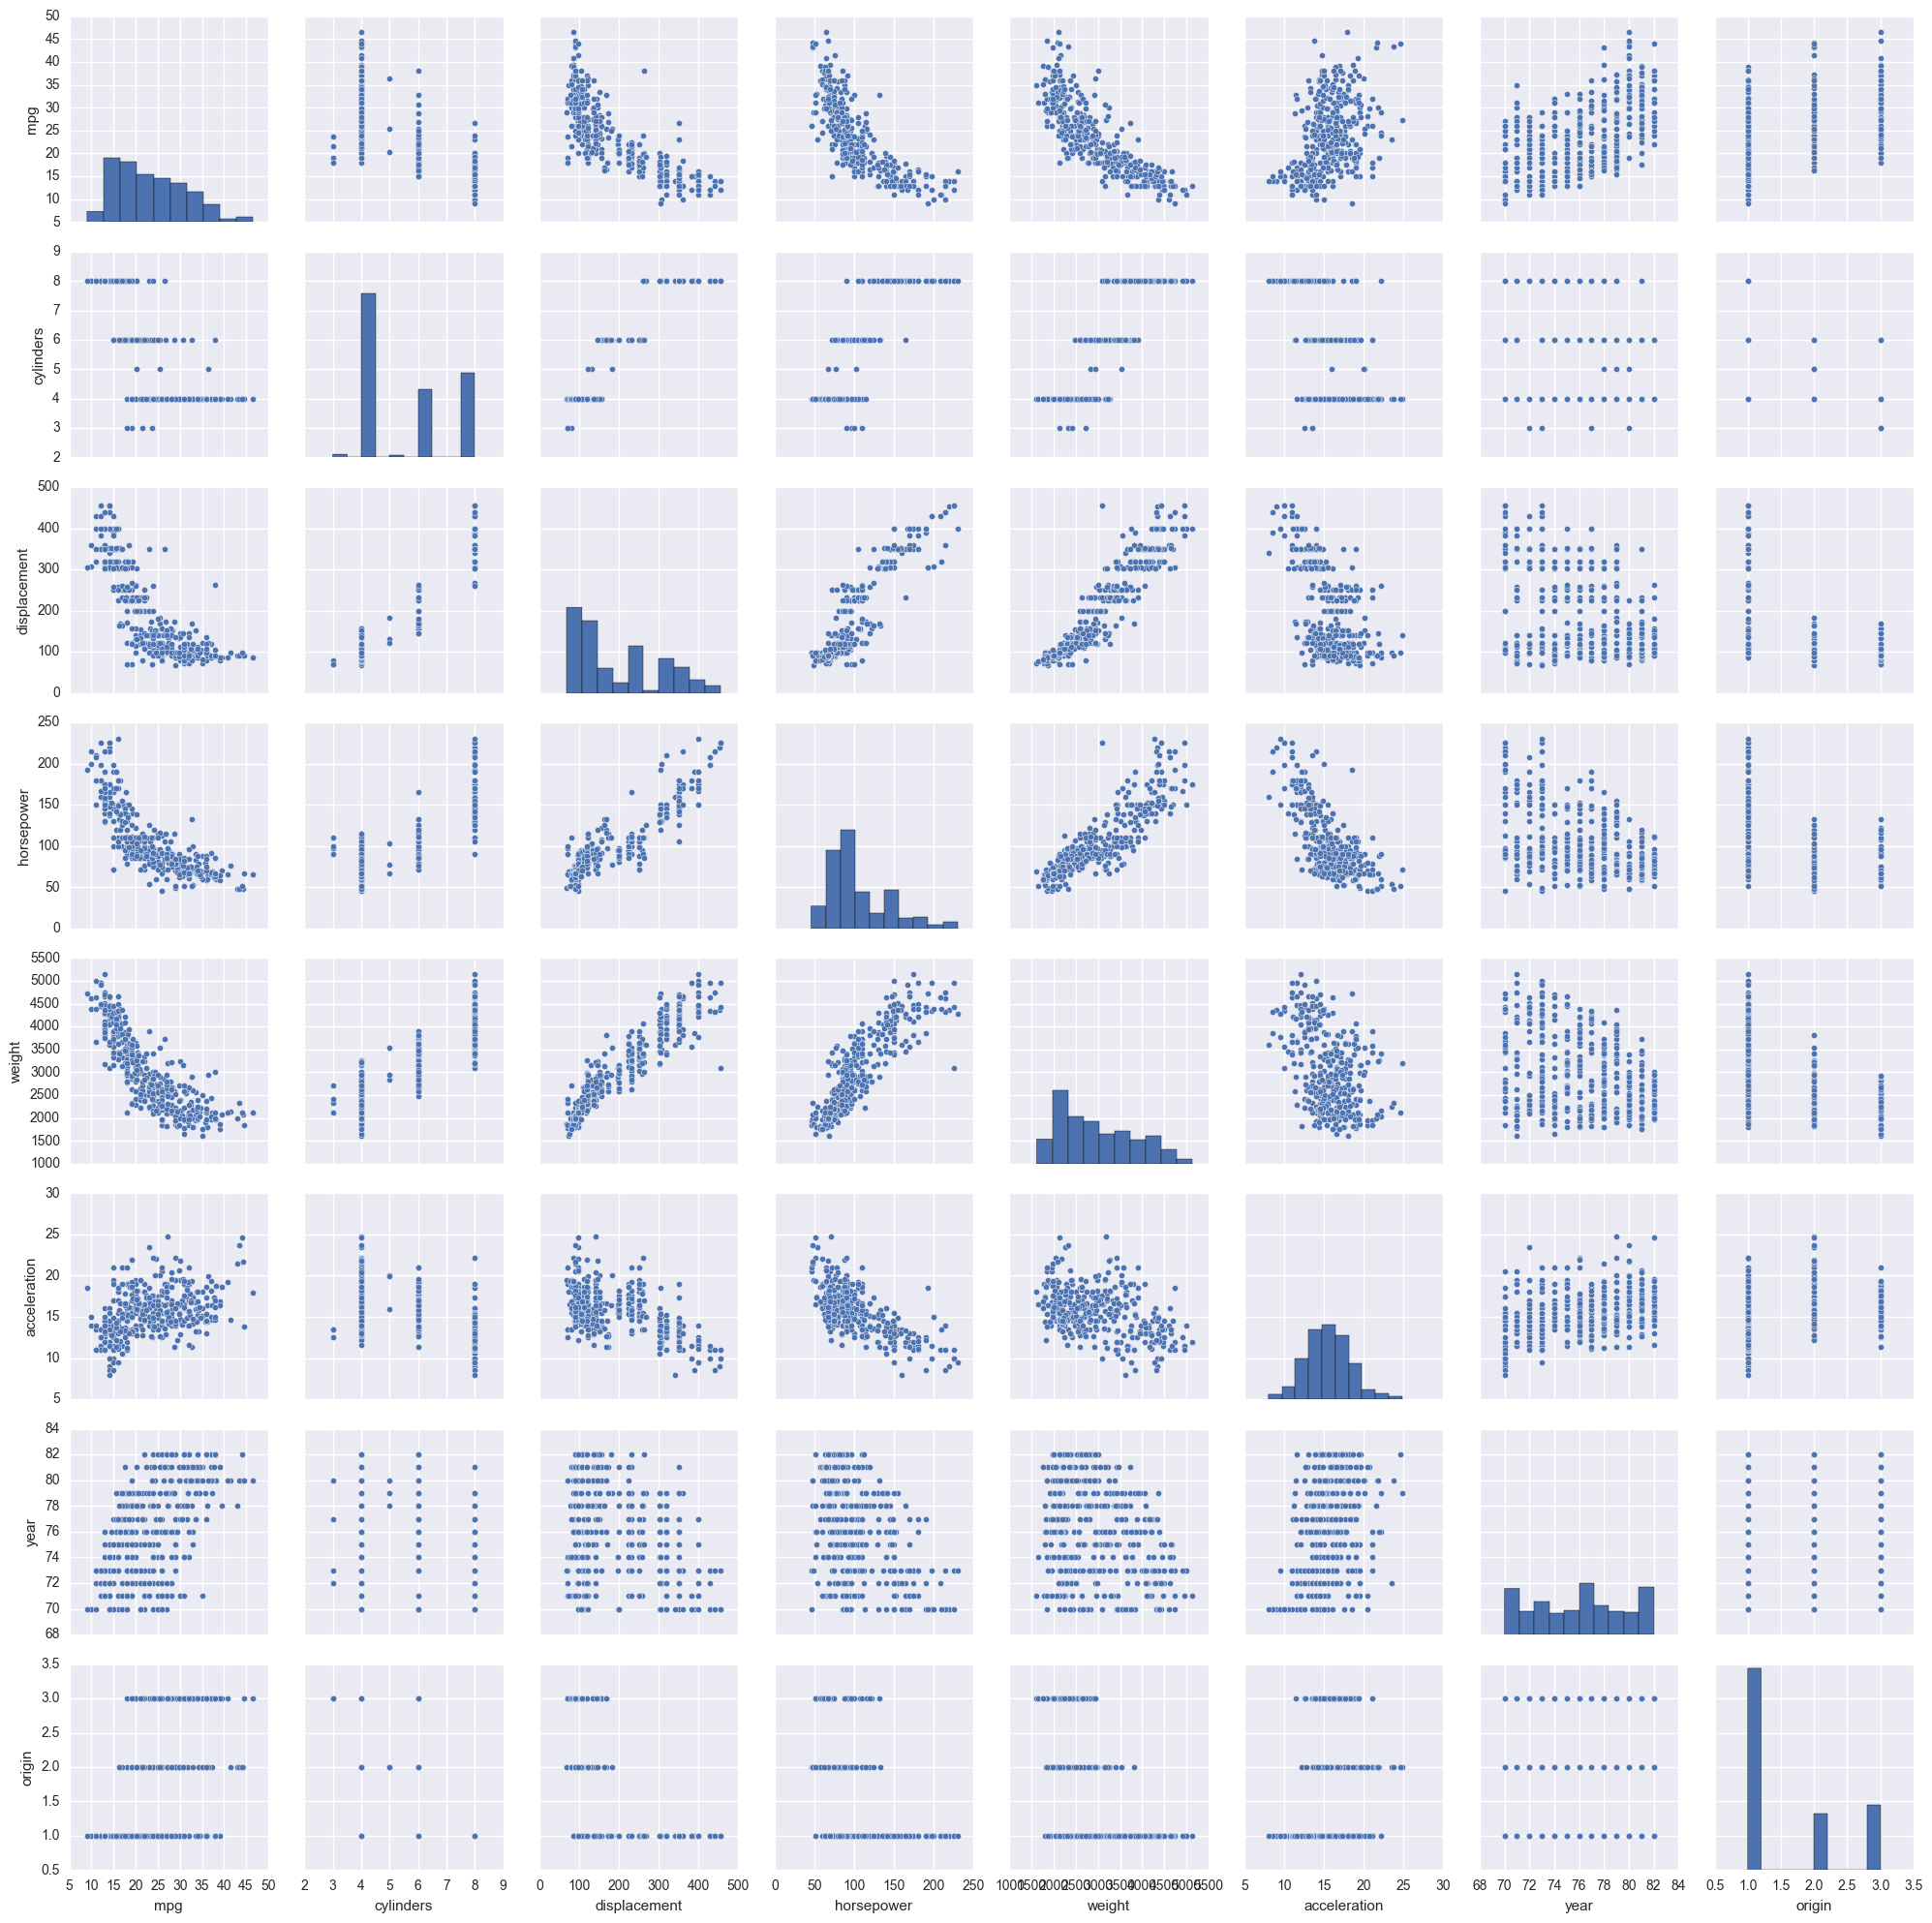

In [1]:
# load libraries
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
# read in data
df = pd.read_csv('../w03d01/Auto.csv')
# drop missing values and convert datatype
df.dropna(inplace=True)
df.drop(list(df.index[df.horsepower=='?']),inplace=True)
df.horsepower = df.horsepower.astype(int)
# pair plots with seaborn
sns.pairplot(df)

In [2]:
df.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


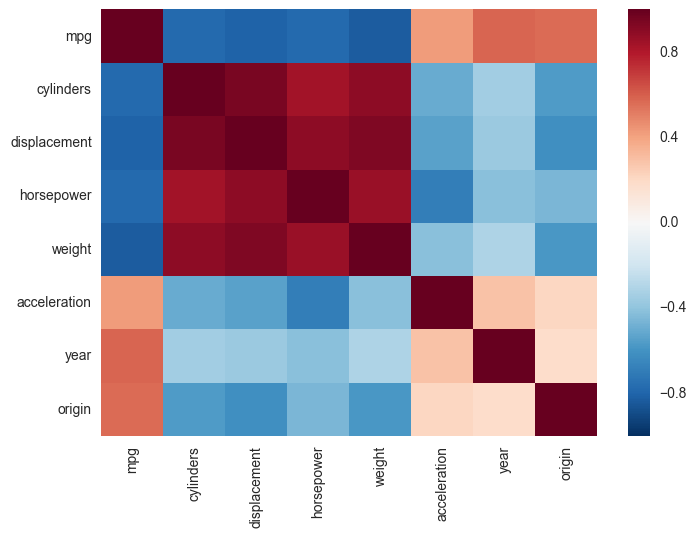

In [3]:
sns.heatmap(df.corr())

In [4]:
df.loc[:,'cylinders':'origin'].head()

,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,8,307.0,130,3504,12.0,70,1
1,8,350.0,165,3693,11.5,70,1
2,8,318.0,150,3436,11.0,70,1
3,8,304.0,150,3433,12.0,70,1
4,8,302.0,140,3449,10.5,70,1


                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Wed, 26 Oct 2016   Prob (F-statistic):          2.04e-139
Time:                        11:18:06   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
const          -17.2184      4.644     -3.707   

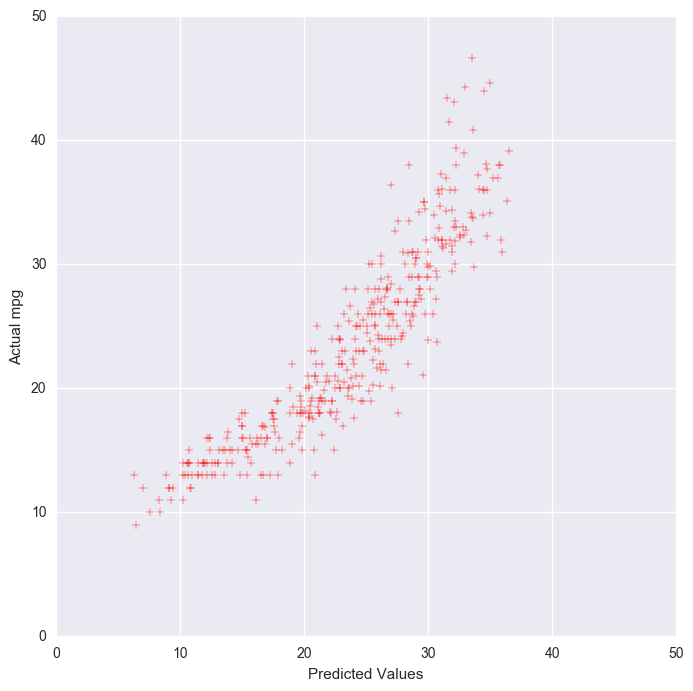

MSE: 11.0734701314


In [5]:
import statsmodels.api as sm

X = df.loc[:,'cylinders':'origin']
X = sm.add_constant(X)
y = df.mpg

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
print model.summary()

# Plot the model
plt.figure(figsize=(8,8))
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.axis([0, 50, 0, 50])
plt.xlabel("Predicted Values")
plt.ylabel("Actual mpg")
plt.show()
print "MSE:", model.mse_resid

mpg increases with years:

In [6]:

model.params['year']

0.750772677950311

In [7]:
# p-values for fit on all features significant (<0.05) for all except cylinders, horsepower and acceleration
model.pvalues

const           2.401841e-04
cylinders       1.277965e-01
displacement    8.444649e-03
horsepower      2.196328e-01
weight          7.874953e-21
acceleration    4.154780e-01
year            3.055983e-39
origin          4.665681e-07
dtype: float64

In [8]:
model.resid.describe()

count    3.920000e+02
mean     7.634800e-13
std      3.297760e+00
min     -9.590261e+00
25%     -2.156516e+00
50%     -1.169410e-01
75%      1.868966e+00
max      1.306043e+01
dtype: float64

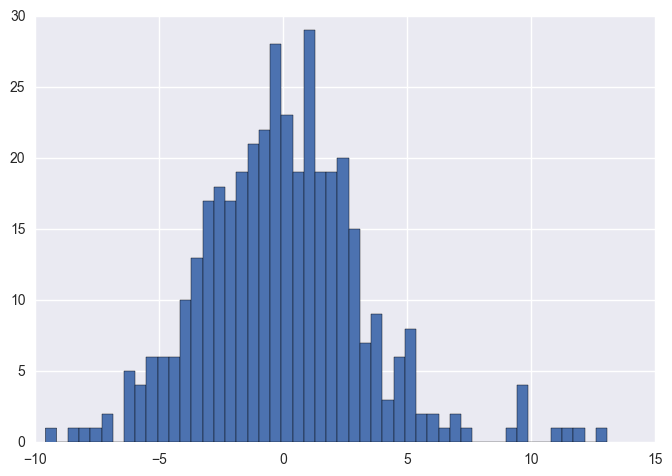

In [9]:
model.resid.hist(bins=50)

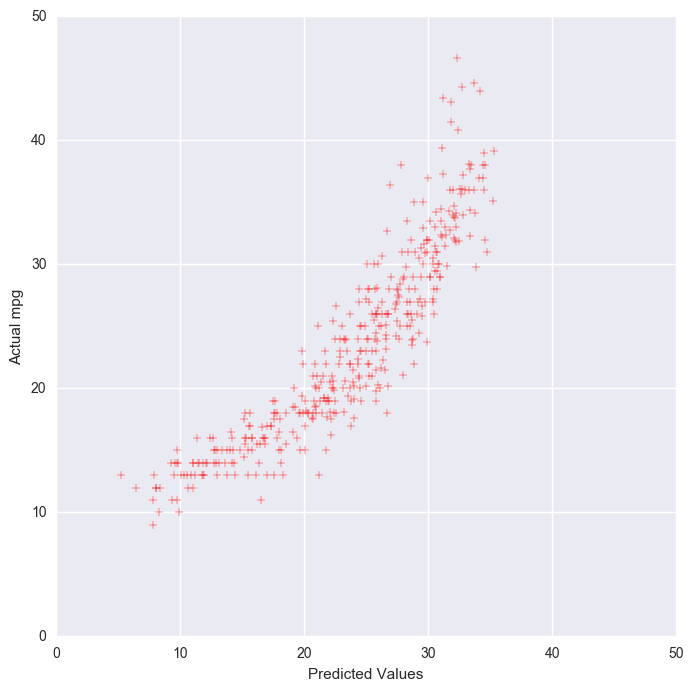

MSE: 11.6276784468


In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = df.loc[:,'horsepower':'year']
y = df['mpg']

# Note the difference in argument order
model = LinearRegression()
model.fit(X, y)
predictions = model.predict(X)

# Plot the model
plt.figure(figsize=(8,8))
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.axis([0, 50, 0, 50])
plt.xlabel("Predicted Values")
plt.ylabel("Actual mpg")
plt.show()
print "MSE:", mean_squared_error(y, predictions)

In [11]:
print 'R2:', model.score(X,y)

R2: 0.808638011636


In [12]:
print 'Regression coefficients: ', model.coef_

Regression coefficients:  [ 0.00262177 -0.0066345   0.08022159  0.75110919]


                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     371.9
Date:                Wed, 26 Oct 2016   Prob (F-statistic):          8.64e-157
Time:                        11:18:08   Log-Likelihood:                -985.61
No. Observations:                 392   AIC:                             1985.
Df Residuals:                     385   BIC:                             2013.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
Intercept           -408.1557     52

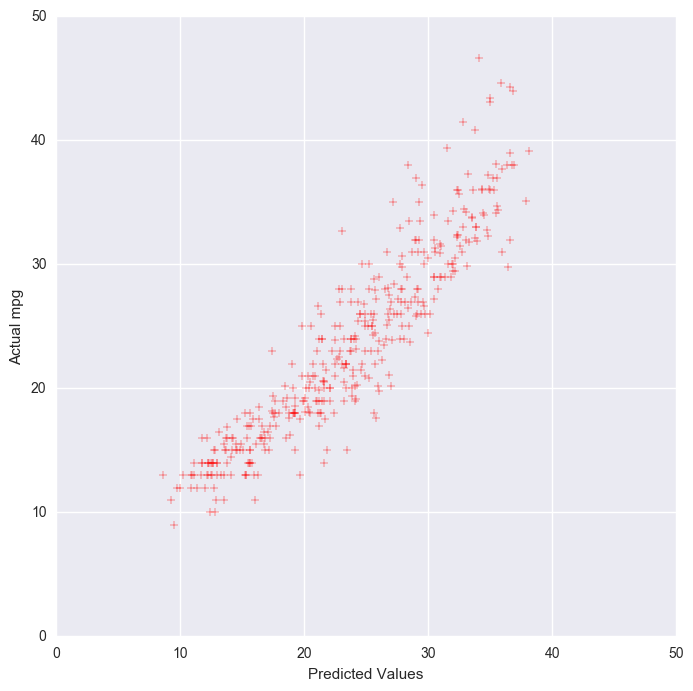

MSE: 9.10442731534


In [13]:
import patsy
from patsy import dmatrix, demo_data

y, X = patsy.dmatrices("mpg ~ horsepower + I(horsepower**2) + weight + horsepower:year + np.log(year) + (acceleration)", data=df)

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

print model.summary()

plt.figure(figsize=(8,8))
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.axis([0, 50, 0, 50])
plt.xlabel("Predicted Values")
plt.ylabel("Actual mpg")
plt.show()
print "MSE:", model.mse_resid

In [14]:
print y.mean(), y.std()

23.4459183673 7.79504576268
